<a href="https://colab.research.google.com/github/italosiqueira/alura-imersao-dados-03/blob/main/colab/03_Correlacao_Causalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# para salvar as onfigurações de visualização padrão do Seaborn (o Colab não aplica por padrão)
sns.set()

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression='zip')
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

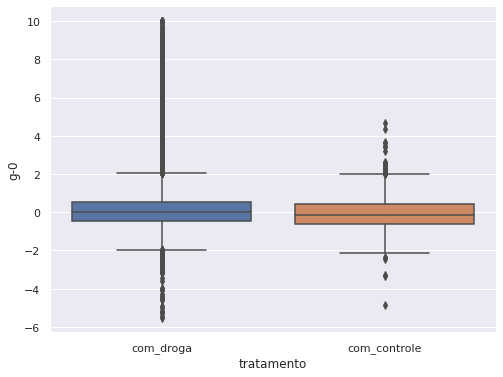

In [53]:
plt.figure(figsize=(8,6))
sns.boxplot(y='g-0', x='tratamento', data=dados)

In [54]:
# renomear uma coluna dos nossos dados de 'drogas' para 'composto'
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)
dados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


**Para lembrar**:
* **Variáveis g**: representam diferentes [expressões gênicas](https://pt.wikipedia.org/wiki/Express%C3%A3o_g%C3%A9nica), que são como pedaços do nosso código genético (DNA) que dão origem a proteínas específicas ou RNA;
* **Variáveis c**: representam diferentes tipos de tecidos celulares e sua viabilidade celular frente aos compostos. Podem variar desde tecidos cancerígenos de diversos tipos até tecidos saudáveis oriundos dos vários sistemas do organismo humano.

### Análise do Tratamento, Duração e Dosagem

In [55]:
# Vamos fazer uma tabela de frequências

# Limitar aos experimentos que utilizaram os compostos
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [56]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [57]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

In [58]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [59]:
# Analisar o que acontece entre 2 variáveis quando o valor delas variam...
# Podemos utilizar um scatter plot!
dados[['g-0', 'g-3']]

,g-0,g-3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


No **Gráfico de Dispersão** (*scatter plot*) consideramos o valor das variáveis como coordenadas no hiperplano, na esperança de observar alguma espécie de relação entre elas (aumento proporcional/inversamente proporcional, retas, curvas, etc)

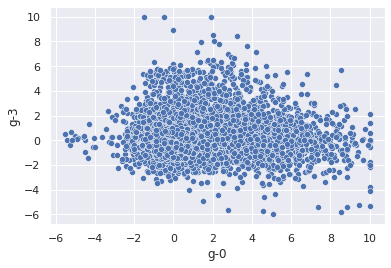

In [60]:
sns.scatterplot(x = 'g-0', y = 'g-3', data=dados)

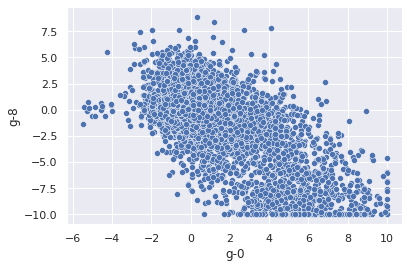

In [61]:
sns.scatterplot(x = 'g-0', y = 'g-8', data=dados)

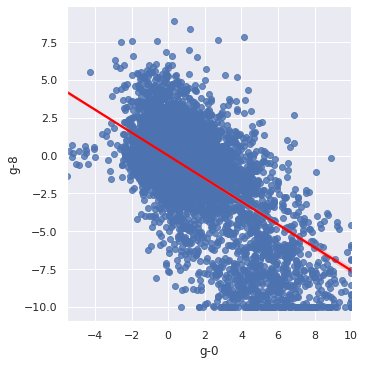

In [62]:
# Outra comparação, agora utilizando uma Reta de Regressão com `Searbon.lmplot`...
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color': 'red'})

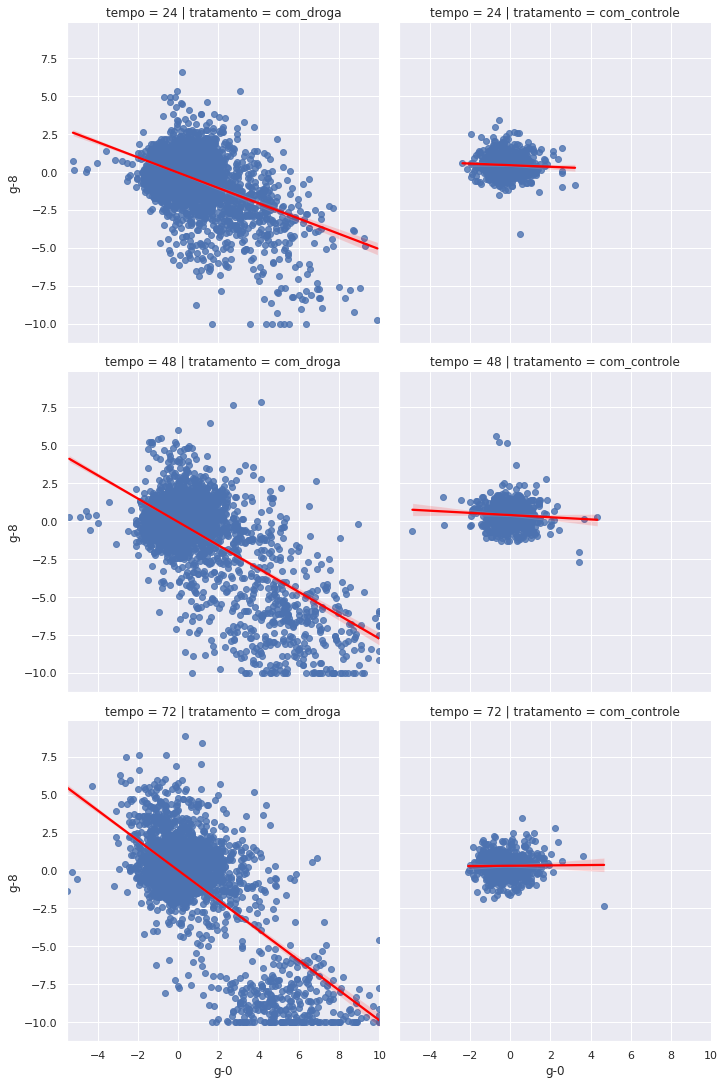

In [63]:
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color': 'red'}, col='tratamento', row='tempo')

Agora vamos calcular a correlação entre as variáveis

In [64]:
dados.loc[:, 'g-0':'g-77'].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50,g-51,g-52,g-53,g-54,g-55,g-56,g-57,g-58,g-59,g-60,g-61,g-62,g-63,g-64,g-65,g-66,g-67,g-68,g-69,g-70,g-71,g-72,g-73,g-74,g-75,g-76,g-77
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,-0.432426,-0.499815,-0.203828,0.021582,-0.023423,-0.119687,0.530238,0.039827,0.238235,0.310583,-0.560201,0.291476,-0.293906,0.263799,0.318724,-0.456709,-0.130850,-0.245901,-0.481191,-0.200365,0.095231,-0.385378,-0.606430,-0.595861,-0.281017,0.343524,0.140962,-0.565075,0.473076,0.226192,-0.411117,-0.108916,-0.617982,0.047563,0.425789,-0.583854,0.125953,0.045385
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,0.000655,-0.110238,0.133896,0.161186,-0.092498,0.031993,0.097674,-0.012420,0.029064,-0.106349,-0.028870,-0.057648,0.037969,-0.059497,-0.019873,0.114727,-0.127237,-0.056013,-0.043314,0.184889,-0.047734,0.098201,0.043737,0.033561,0.093231,0.017870,-0.060414,-0.009744,0.115366,-0.115127,0.043924,-0.146851,0.018767,-0.051308,-0.077804,-0.061028,-0.193569,0.169996
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,-0.080201,-0.109646,-0.121433,-0.086435,0.021241,-0.036105,0.142712,-0.009575,0.039119,0.052003,-0.140002,0.047647,-0.058874,0.054844,0.085142,-0.159016,-0.035817,-0.042007,-0.128388,-0.124065,0.090874,-0.138144,-0.137042,-0.189124,-0.168975,0.072918,0.081314,-0.153966,0.102565,0.099248,-0.121961,-0.000929,-0.158893,0.024717,0.132877,-0.142404,0.058466,-0.120604
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,0.114685,-0.047136,-0.010941,-0.168398,-0.001770,0.065444,0.082046,0.297146,0.173796,0.072970,-0.233491,0.125193,-0.163648,0.012809,0.068682,-0.126877,-0.037438,0.172727,-0.219228,-0.271885,-0.025451,-0.023958,-0.053789,-0.216742,-0.091471,0.102956,0.069750,-0.111437,0.110005,0.051048,-0.150679,-0.071811,-0.167255,-0.092064,0.032410,-0.043274,0.027242,-0.012302
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,-0.309149,-0.373390,0.071462,0.185361,-0.105936,-0.033695,0.355833,-0.060724,0.006138,0.114748,-0.315675,0.165373,-0.069761,0.185821,0.116731,-0.146464,-0.130330,-0.272397,-0.292469,0.001778,0.128815,-0.037494,-0.361359,-0.2

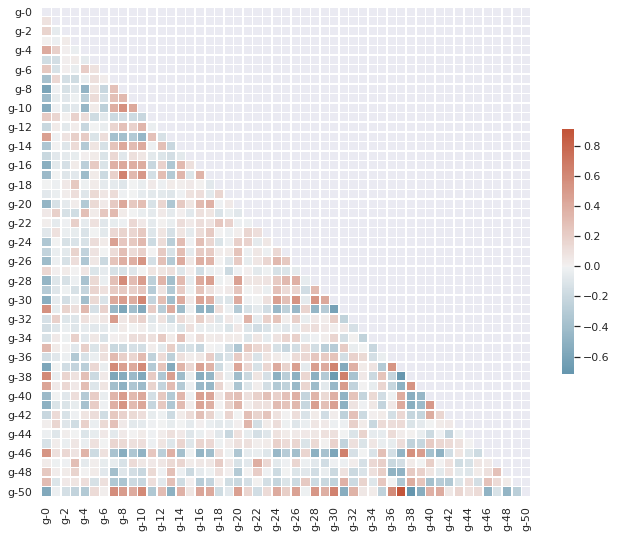

In [65]:
# Compute the correlation matrix
corr = dados.loc[:, 'g-0':'g-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

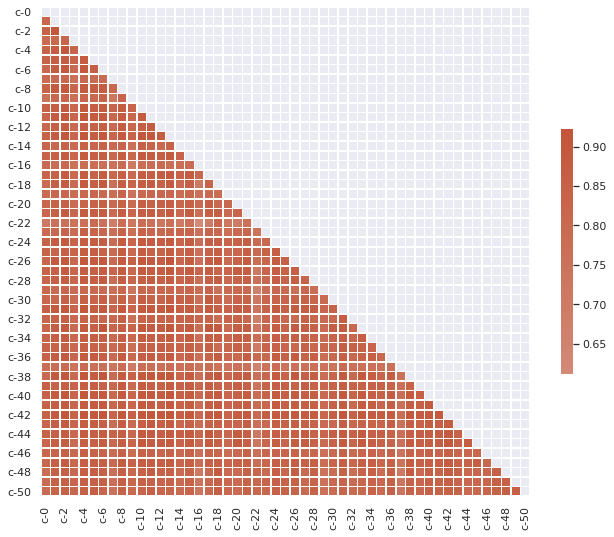

In [66]:
# Compute the correlation matrix
corr = dados.loc[:, 'c-0':'c-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Desafio 01: Criar tabelas de frequência com o pandas.groupby()

In [67]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [68]:
# dica do @renatodanova
dadosDoseTempoTotal = dados.groupby(by=['dose', 'tempo', 'tratamento']).count()['id'].sum(level=[0,1])
(dados.groupby(by=['dose', 'tempo', 'tratamento']).count()['id']/dadosDoseTempoTotal).unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

### Desafio 02: Normalizar o crosstab pela coluna

In [69]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

### Desafio 03: Que outros agregadores existem no método `crosstab`?

In [70]:
# De acordo com a página Pandas groupby: 13 Functions To Aggregate (https://cmdlinetips.com/2019/10/pandas-groupby-13-functions-to-aggregate/?amp=1)

# Média de variação da expressão gênica 'g-0' de acordo com a dose, tempo e tratamento
# Veja por si mesmo: dados.query('dose == "D1"').query('tempo == "24"')['g-0'].min()
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [86]:
# Valor mínimo de variação da expressão gênica 'g-0' de acordo com a dose, tempo e tratamento
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='min')


tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

In [73]:
# Valor máximo de variação da expressão gênica 'g-0' de acordo com a dose, tempo e tratamento
# Veja por si mesmo: dados.query('dose == "D1"').query('tempo == "24"')['g-0'].max()
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

In [91]:
# Quantidade de ocorrências
pd.crosstab(dados['tempo'], dados['dose'], values=dados['id'], aggfunc='count', margins=True, margins_name='Total')

dose,D1,D2,Total
tempo,,,
24,3886,3886,7772
48,4354,3896,8250
72,3907,3885,7792
Total,12147,11667,23814


In [94]:
dados.groupby(by=['dose', 'tempo', 'tratamento']).count()['id'].sum(level=[0,1])

dose  tempo
D1    24       3886
      48       4354
      72       3907
D2    24       3886
      48       3896
      72       3885
Name: id, dtype: int64

### Desafio 04: Explorar o método `melt`

O método `melt` é capaz de desvincular as colunas separando-as em dois grupos, indicados pelo usuário: um conjunto de colunas cujos valores serão considerados identificadores, enquanto as demais serão utilizadas como valores.

Deste modo a tabela parece ser "desenrolada" em relação às variáveis escolhidas.

In [102]:
dados.melt(['tratamento', 'dose'], ['g-0'])

,tratamento,dose,variable,value
0,com_droga,D1,g-0,1.0620
1,com_droga,D1,g-0,0.0743
2,com_droga,D1,g-0,0.6280
3,com_droga,D1,g-0,-0.5138
4,com_droga,D2,g-0,-0.3254
...,...,...,...,...
23809,com_droga,D2,g-0,0.1394
23810,com_droga,D2,g-0,-1.3260
23811,com_controle,D2,g-0,0.3942
23812,com_droga,D1,g-0,0.6660


In [101]:
dados.melt(['tratamento', 'dose'], ['g-0','c-0'])

,tratamento,dose,variable,value
0,com_droga,D1,g-0,1.0620
1,com_droga,D1,g-0,0.0743
2,com_droga,D1,g-0,0.6280
3,com_droga,D1,g-0,-0.5138
4,com_droga,D2,g-0,-0.3254
...,...,...,...,...
47623,com_droga,D2,c-0,0.4224
47624,com_droga,D2,c-0,0.2144
47625,com_controle,D2,c-0,1.0650
47626,com_droga,D1,c-0,0.5377


### Desafio 05: Calcular e analisar  correlação entre os g's e c's. Refletir sobre os efeitos biológicos

In [113]:
# dica do IgorBascAlves
# 1. Obter uma super matriz de correlação com todos os g's e c's
corrSuper = dados.loc[:, 'g-0':'c-99'].corr()
# 2. Selecionar em seguida somente as linhsa (c's) e colunas (g's) que nos interessam. Ajudou o fato dos cs e gs estarem em intervalos contínuos.
corrFinal = corrSuper.loc['c-0':'c-99', 'g-0':'g-771']
corrFinal

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
c-0,-0.624116,-0.037405,-0.168656,-0.037342,-0.403545,0.209358,-0.103316,0.486478,0.621422,0.435235,0.586035,-0.231425,0.345752,-0.455353,0.468143,0.041219,0.568077,0.511811,-0.032060,0.078310,0.443028,0.108853,0.085712,0.152211,0.456591,0.330978,0.496350,-0.177204,0.558456,0.367153,0.656611,-0.692572,0.211714,-0.084536,0.256107,-0.269916,0.145813,0.626157,-0.755459,-0.528145,...,-0.429262,0.588808,-0.233971,-0.082959,0.364226,0.058799,0.307816,0.327954,0.047980,0.176797,0.462447,0.426196,-0.742731,-0.402435,-0.366744,-0.083647,-0.295825,0.222649,-0.604615,-0.079019,-0.414335,0.079513,-0.314377,0.161953,0.180167,-0.105390,-0.297293,0.219748,0.773982,0.489295,-0.054505,0.162083,-0.609010,-0.441749,0.347544,-0.116224,-0.399458,0.101879,0.599133,-0.509795
c-1,-0.624810,-0.030558,-0.178692,-0.093505,-0.379840,0.198890,-0.079528,0.553859,0.601678,0.475424,0.643461,-0.270409,0.361244,-0.483859,0.478114,0.056521,0.564153,0.509560,-0.071016,0.029949,0.368740,0.144788,0.078909,0.167012,0.478737,0.292106,0.508493,-0.158347,0.580010,0.383963,0.703746,-0.695461,0.277929,-0.036666,0.208706,-0.200159,0.282088,0.705889,-0.794085,-0.537176,...,-0.431604,0.591056,-0.193954,-0.034960,0.265992,0.092229,0.373585,0.348084,0.033582,0.214438,0.527661,0.446052,-0.761864,-0.452019,-0.416495,-0.054203,-0.273798,0.297677,-0.613134,-0.065293,-0.436506,0.045118,-0.314071,0.212862,0.192816,-0.094439,-0.275168,0.105298,0.784535,0.580017,-0.046682,0.089522,-0.653083,-0.433142,0.402415,-0.077256,-0.446151,0.109868,0.627124,-0.513554
c-2,-0.639789,-0.039616,-0.176733,-0.085298,-0.392841,0.211988,-0.078782,0.565002,0.597372,0.488331,0.640281,-0.276064,0.357949,-0.491421,0.484984,0.072825,0.587143,0.511541,-0.058010,0.041212,0.407185,0.125998,0.062507,0.160576,0.499975,0.304229,0.550255,-0.170310,0.580436,0.390478,0.722014,-0.708771,0.287357,-0.042537,0.231382,-0.243065,0.263756,0.720190,-0.819262,-0.562878,...,-0.441646,0.632338,-0.203576,-0.042660,0.297476,0.068967,0.379238,0.351261,0.042410,0.196088,0.535071,0.469515,-0.792795,-0.455940,-0.410587,-0.040656,-0.283404,0.294138,-0.639580,-0.062382,-0.443022,0.030408,-0.295096,0.213105,0.202687,-0.093480,-0.271373,0.120903,0.800393,0.593035,-0.061631,0.094180,-0.669732,-0.464219,0.393142,-0.062198,-0.469979,0.075646,0.650477,-0.529152
c-3,-0.604041,0.011899,-0.156894,-0.029079,-0.357850,0.193327,-0.093048,0.520284,0.564174,0.454065,0.587696,-0.232065,0.330601,-0.450723,0.475338,0.049883,0.555897,0.488323,-0.020933,0.076050,0.395583,0.123346,0.096140,0.172537,0.453716,0.295243,0.513194,-0.177194,0.507051,0.347568,0.646316,-0.672488,0.289150,-0.122636,0.270989,-0.253685,0.186842,0.655762,-0.763876,-0.527457,...,-0.432637,0.590401,-0.212221,-0.079346,0.337035,0.048161,0.299862,0.316293,0.071071,0.156163,0.488243,0.418559,-0.755448,-0.400980,-0.365931,-0.064329,-0.304418,0.250746,-0.609495,-0.075384,-0.419961,0.062204,-0.288690,0.174535,0.185477,-0.128296,-0.290250,0.191123,0.754548,0.527729,-0.078319,0.118333,-0.611692,-0.455413,0.370731,-0.087770,-0.430197,0.042305,0.607691,-0.492582
c-4,-0.606231,-0.027014,-0.180127,-0.065964,-0.365118,0.206762,-0.055324,0.562647,0.545600,0.485965,0.622138,-0.260521,0.375820,-0.454998,0.491743,0.061464,0.573910,0.494453,-0.068624,0.015357,0.409882,0.147165,0.058114,0.168337,0.509640,0.304879,0.554534,-0.144067,0.553227,0.376674,0.707700,-0.694870,0.303024,-0.077581,0.303429,-0.237223,0.250828,0.706684,-0.818646,-0.549565,...,-0.445962,0.616673,-0.184301,-0.052599,0.300658,0.047971,0.375394,0.338664,0.039968,0.187692,0.516360,0.436941,-0.786431,-0.445463,

O objetivo desta análise é mostrar a relação entre a viabilidade dso diferentes tipos de tecido celular e sua relação com a intensidade das expressões génicas.

Deste modo podemos levantar hipóteses do tipo: a viabilidade celular de um certo tecido resulta no aumente/redução da expressão génica de certos genes. Ou cruzar esses dados para saber que grupos de tecidos afetam positivamente que expressões génicas.

A partir dessa hipótese, e presumindo que é mais fácil/rápido observar alterações a nível celurar, eu poderia chegar às mesmas conclusões sobre os tratamentos observando somente a viabilidade celular dos tecidos?

### Desafio 06: Estudar a rotina de criação do nosso _heatmap_ de correlação

Primeiro nós deveremos já ter gerado a nossa matriz sobre a qual será produzido o _heatmap_. Neste exemplo,  vamos utiliza a `corrFinal`, que verifica a correlação entre os tipos celulares (c) e as expressões génicas (g).

Em seguida, procedemos com a criação de uma _máscara_ para o método `Seaborn.heatmap`. A máscara indica que os elementos cuja posição na máscara são True não serão mostrados:
```
mask = np.triu(np.ones_like(corr, dtype=bool))
```

Onde `triu` é um método que retorna uma cópia do _array_ com os elementos abaixo da k-th diagonal zerados (padrão é a diagional 0). `ones_like` retorna um _array_ de 1s (ou True, se o tipo for booleano) com o mesmo formato e tipo, se nenhum for especificado, do _array_ de origem.

Continuando,  precisamos de um mapa de cores, que relaciona valores a cores. Os limites do mapa de cores são 20 e 220. `as_cmap` indica que o retorno deve ser um objeto do tipo `matplotlib colormap`:
```
cmap = sns.diverging_palette(20, 220, l=65,  as_cmap=True)
```
E por fim, criamos nosso _heatmap_ com os objetos criados anteriormente e com o _aspect ratio_ correto:
```
sns.heatmap(corrFinal.loc['c-0':'c-20', 'g-0':'g-20'], cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
```

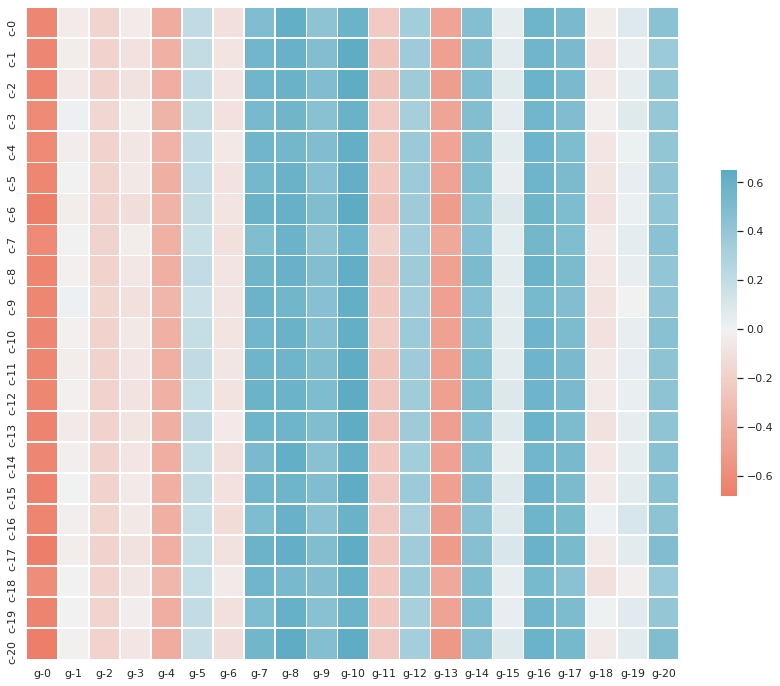

In [141]:
# Matriz de correlação a se utilizada será a corrFinal

# Máscara para o método Seaborn.heatmap. A máscara indica que os elementos cuja posição na máscara são True não serão mostrados.
# triu: Triângulo superior da matriz. retorna uma cópia do array com os elementos abaixo da k-th diagonal zerados (padrão é a diagional 0)
# ones_like: retorna um array de 1s (ou True, se o tipo for booleano) com o mesmo formato e tipo, se nenhum for especificado, do array de origem.
mask = np.triu(np.ones_like(corr, dtype=bool))

# Define o tamanho da imagem
f, ax = plt.subplots(figsize=(15, 12))

# Gera um mapa de cores, que relaciona valores a cores. Os limites do mapa de cores são 230 e 20. as_cmap indica que o retorno deve ser um objeto.
cmap = sns.diverging_palette(20, 220, l=65,  as_cmap=True)

# Desenha o heatmap com os objetos criados anteriormente e com o aspect ratio correto
sns.heatmap(corrFinal.loc['c-0':'c-20', 'g-0':'g-20'], cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Desafio 07: Resumo sobre o que você aprendeu

Aprendemos a:
* computar uma matriz de frequências sobre nossos dados com `crosstab`;
* interpretar a  matriz de frequências;
* utilizar o método `groupby()` sobre nosso `DataFrame` para extrair dados agregados sobre grupos de variáveis observadas;
** um bônus que observei é que o método `crosstab` oferece uma maneira mais prática de chegar a certos resultados do que o `groupby`. Este, no entanto, é bem mais versátil. Ficar esperto para saber quando e como utilizar um ou o outro;
* estudei os métodos de agregação possíveis para o `crosstab`;
* gerar um Gráfico de Dispersão e sua Reta de Regressão para estudar o relacionamento entre diferentes variáveis;
* gerar uma matriz de correlação entre variáveis e interpretá-la;
* aplicr um heatmap sobre matrizes de correlação para facilitar visualmente a análise.

#### Links úteis

* [Pandas groupby: 13 Functions To Aggregate](https://cmdlinetips.com/2019/10/pandas-groupby-13-functions-to-aggregate/?amp=1)
* [Pandas Crosstab Explained](https://pbpython.com/pandas-crosstab.html)
* [Better Heatmaps and Correlation Matrix Plots in Python](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec)
* [Python correlation matrix tutorial](https://likegeeks.com/python-correlation-matrix/)